In [ ]:
import torch
import torch.nn as nn


In [6]:
class Discriminator(nn.Module):
    def __init__(self,input_features):
        super(Discriminator,self).__init__()
        self.disc = nn.Sequential(
            nn.Linear(input_features,256),
            nn.LeakyReLU(0.1),
            nn.Linear(256,128),
            nn.LeakyReLU(0.1),
            nn.Linear(128,1),
            nn.Sigmoid()
        )
    def forward(self,x):
        return self.disc(x)



class Generator(nn.Module):
    def __init__(self,z_dim,img_dim):
        super(Generator,self).__init__()
        self.gen = nn.Sequential(
            nn.Linear(z_dim,256),
            nn.LeakyReLU(0.1),
            nn.Linear(256,img_dim),
            nn.Tanh()
        )
    def forward(self,x):
        return self.gen(x)
        

In [10]:
import torch.optim as optim
#HyperParameters
lr=3e-4
device="cuda" if torch.cuda.is_available() else "cpu"
num_epochs=100
batch_size=32
z_dim=64
img_dim=784
disc=Discriminator(img_dim).to(device)
gen=Generator(z_dim,img_dim).to(device)
optim_disc=optim.Adam(disc.parameters(),lr=lr)
optim_gen=optim.Adam(gen.parameters(),lr=lr)
criterion=nn.BCELoss()
fixedNoise=torch.randn(batch_size,z_dim).to(device)

In [11]:
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torchvision import datasets
myTransforms=transforms.Compose(
    [transforms.ToTensor(),transforms.Normalize((0.1307,),(0.3081,))]
)
dataset=datasets.MNIST(root='./data',transform=myTransforms,download=True)
loader=DataLoader(dataset,batch_size=batch_size,shuffle=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



torch.Size([28, 28])


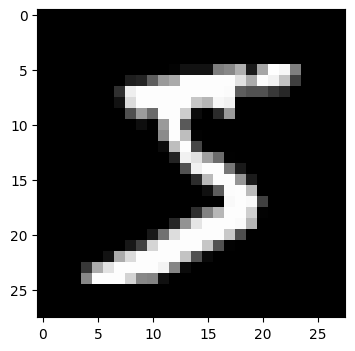

In [23]:
import matplotlib.pyplot as plt

print(dataset.train_data[0].shape)
img=dataset.train_data[0]
plt.figure(figsize=(4,4))
plt.imshow(img,cmap='gray')
plt.show()



In [27]:
# Iterate over loader to check if tensor created in (batch,img_dim)
it=iter(loader)
first,label=next(it)
first.shape

torch.Size([32, 1, 28, 28])

In [29]:
#training

for epochs in range(num_epochs):
    for idx,(real_img,_) in enumerate(loader):
        real_img=real_img.view(-1,784).to(device)
        batch_size=real_img.shape[0]
        noise=torch.randn(batch_size,z_dim).to(device)
        fake_img=gen(noise)
        disc_real=disc(real_img)
        disc_fake=disc(fake_img)


        #Discrimintor Loss ---> log(d(x))+log(1-d(g(z)))
        disc_fake_loss=criterion(disc_fake,torch.ones_like(disc_fake))
        disc_real_loss=criterion(disc_real,torch.ones_like(disc_real))

        discLoss=(disc_fake_loss+disc_real_loss)/2
        disc.zero_grad()
        discLoss.backward(retain_graph=True)
        optim_disc.step()
        # optim_disc.zero_grad()

        # Generator Loss ---> log(1-d(g(z)))

        output=disc(fake_img)
        genLoss=criterion(output,torch.ones_like(output))
        gen.zero_grad()
        genLoss.backward()
        optim_gen.step()

        if idx == 0:
            print(f'Epochs {epochs}/{num_epochs} |Batch: {idx}/{len(loader)} | Gen Loss {genLoss:.4f} ')



Epochs 0/100 |Batch: 0/1875 | Gen Loss 0.6659 
Epochs 1/100 |Batch: 0/1875 | Gen Loss 0.0000 
Epochs 2/100 |Batch: 0/1875 | Gen Loss 0.0000 


KeyboardInterrupt: 

In [30]:
res=gen(fixedNoise)
res.shape

torch.Size([32, 784])

In [ ]:
plt.figure(figsize=(4,4))
noise=torch.randn(28,28)
plt.imshow(noise,cmap='grey')
plt.show()